In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/alexmorifusa/Downloads/module-0-class-survey-data-table_seven/data/background-clean.csv')
df = df[['response_id', 'prog.comf', 'math.comf', 'stat.comf', 'PSTAT120', 'PSTAT122', 'PSTAT126', 'CS9']]

df

,response_id,prog.comf,math.comf,stat.comf,PSTAT120,PSTAT122,PSTAT126,CS9
0,1,5,4,5,1,1,1,1
1,2,5,4,4,1,0,1,0
2,3,4,4,4,1,1,0,1
3,4,4,3,4,0,0,1,0
4,6,3,3,3,1,1,1,0
5,7,3,5,5,0,1,1,1
6,8,3,3,3,1,1,1,1
7,9,4,4,5,1,0,1,0
8,10,4,4,4,1,1,1,1
9,11,4,4,3,1,0,0,1


In [3]:
# Create df for those who are done with PSTAT requirements and not done
df_done = df[(df['PSTAT120'] == 1) &
             (df['PSTAT122'] == 1) &
             (df['PSTAT126'] == 1) &
             (df['CS9'] == 1)]

df_not_done = df[(df['PSTAT120'] == 0) |
             (df['PSTAT122'] == 0) |
             (df['PSTAT126'] == 0) | 
             (df['CS9'] == 0)]

df_not_done = df_not_done[(df_not_done['PSTAT122'] == 1) |
                          (df_not_done['PSTAT126'] == 1)]



In [4]:
print(len(df_done), len(df_not_done))

# About half in sample size for those who haven't finished the required PSTAT courses vs those who have

30 16


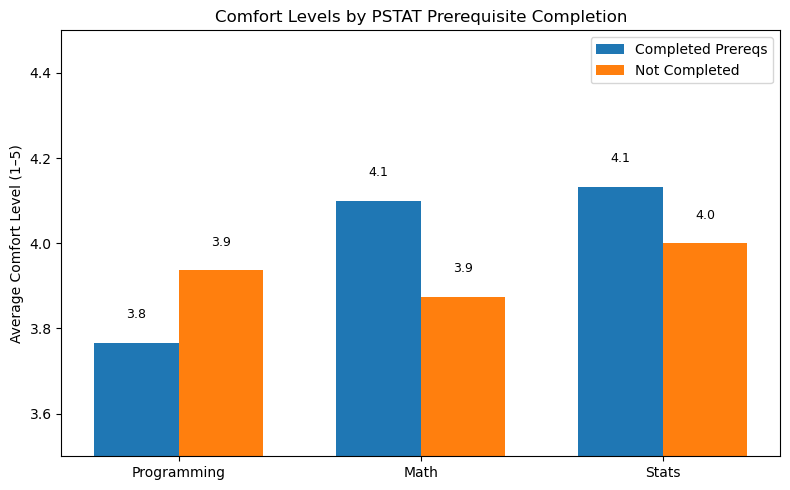

In [56]:
# Visual

import matplotlib.pyplot as plt
import numpy as np

skills = ['prog.comf', 'math.comf', 'stat.comf']

done_means = df_done[skills].mean()
not_done_means = df_not_done[skills].mean()

x = np.arange(len(skills))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
bars1 = ax.bar(x - width/2, done_means, width, label='Completed Prereqs')
bars2 = ax.bar(x + width/2, not_done_means, width, label='Not Completed')

ax.set_xticks(x)
ax.set_xticklabels(['Programming', 'Math', 'Stats'])
ax.set_ylabel('Average Comfort Level (1–5)')
ax.set_title('Comfort Levels by PSTAT Prerequisite Completion')
ax.legend()

ax.set_ylim(3.5, 4.5)
            
# Add labels on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.05, f'{height:.1f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
